# Exploration
Just playing with the JHU data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
plt.style.use('dark_background')

In [2]:
data_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
os.listdir(data_dir)

['time_series_19-covid-Recovered.csv',
 'time_series_19-covid-Deaths.csv',
 'README.md',
 '.gitignore',
 'time_series_19-covid-Confirmed.csv',
 '.ipynb_checkpoints']

In [4]:
conf = pd.read_csv(data_dir + "/time_series_19-covid-Confirmed.csv")
recovery = pd.read_csv(data_dir + "/time_series_19-covid-Recovered.csv")
deaths = pd.read_csv(data_dir + "/time_series_19-covid-Deaths.csv")

In [5]:
conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


In [6]:
dt.datetime.strptime("01/21/1995", "%m/%d/%Y")

datetime.datetime(1995, 1, 21, 0, 0)

In [7]:
def region_plot(region):
    """
    Takes in a region and plots the time series of confirmed cases
    """
    df = conf.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
    df = df.loc[region]
    
    df.plot()
    plt.title(region)
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

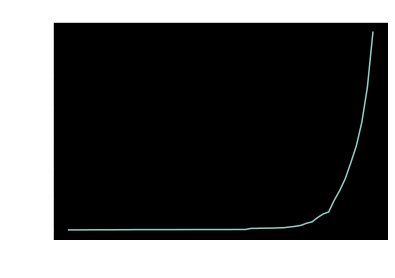

In [8]:
region_plot("US")

In [9]:
date_cols = conf.columns[4:]

In [10]:
conf[date_cols].sum(axis=0).to_json(orient='records')

'[555,653,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19881,23892,27635,30817,34391,37120,40150,42762,44802,45221,60368,66885,69030,71224,73258,75136,75639,76197,76823,78579,78965,79568,80413,81395,82754,84120,86011,88369,90306,92840,95120,97882,101784,105821,109795,113561,118592,125865,128343,145193,156097,167449,181530,197145]'

In [11]:
s = conf[date_cols].sum(axis=0) - deaths[date_cols].sum(axis=0) - recovery[date_cols].sum(axis=0)

In [12]:
df = s.to_frame().reset_index()

In [13]:
df.rename(columns={'index': 'date', 0:'count'})

,date,count
0,1/22/20,510
1,1/23/20,605
2,1/24/20,879
3,1/25/20,1353
4,1/26/20,2010
5,1/27/20,2784
6,1/28/20,5340
7,1/29/20,5907
8,1/30/20,7920
9,1/31/20,9492


# Work on server code to make table

In [16]:
conf.loc[conf["Country/Region"] == "US"]["Province/State"].values

array(['Washington', 'New York', 'California', 'Massachusetts',
       'Diamond Princess', 'Grand Princess', 'Georgia', 'Colorado',
       'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Kitsap, WA', 'Solano, CA', 'Santa Cruz, CA', 'Napa, CA',
       'Ventura, CA', 'Worcester, MA', 'Gwinnett, GA', 'DeKalb, GA',
       'Floyd, GA', 'Fayette, GA', 'Gregg, TX', 'Monmouth, NJ',
       'Burlington, NJ', 'Camden, NJ', 'Passaic, NJ'